⚠️ 重複検出: g2125020@fun.ac.jp（基礎UML言語 - keilabtest7）はすでに登録済みなのでスキップ


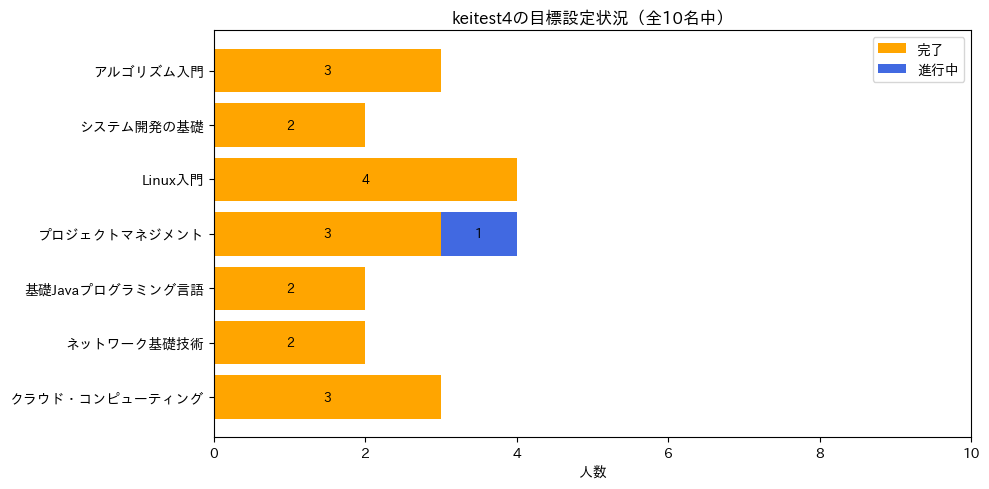

✅keitest4の積み上げグラフを保存しました: /home/jovyan/work/graph_image/keitest4_progress_stacked.png


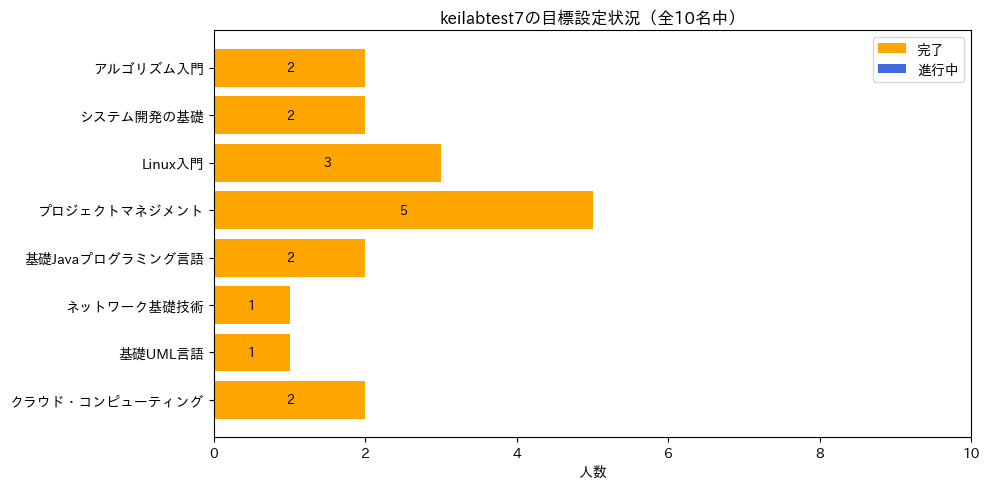

✅keilabtest7の積み上げグラフを保存しました: /home/jovyan/work/graph_image/keilabtest7_progress_stacked.png


In [1]:
# 目標設定の進捗をグラフ化し、そのグラフをpng保存するプログラム
# 指定したフォルダのパスの中身のcsvファイルすべてに対して、グラフを作成してpng出力するプログラム（フォルダを指定しないといけない...）
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import japanize_matplotlib
from zoneinfo import ZoneInfo  # Python 3.9以上
from pathlib import Path

import glob
from collections import defaultdict, Counter  # ← Counterを追加
import json



# 定数として定義
# folder_path = '/home/jovyan/work/shared_downloads/Purpose/20250520(no)'
folder_path = Path('/home/jovyan/work/shared_downloads/Purpose/20250529')
OUTPUT_DIR = "/home/jovyan/work/graph_image"
GROUP_NAME = "none"
TOTAL_STUDENTS = 10



#残したい行を指定（グループの参加者を絞る）
#自律性・有能感・関連性を支援したグループ
rows_to_keep_group1 = [
    "g2125004@fun.ac.jp",
    "g2125007@fun.ac.jp",
    "g2125010@fun.ac.jp",
    "g2125013@fun.ac.jp",
    "g2125018@fun.ac.jp",
    "g2125023@fun.ac.jp",
    "g2125040@fun.ac.jp",
    "g2125057@fun.ac.jp",
    "g2125059@fun.ac.jp",
    "g2125069@fun.ac.jp"
]

#自律性だけ支援したグループ
rows_to_keep_group3 = [
    "g2125020@fun.ac.jp",
    "g2125021@fun.ac.jp",
    "g2125025@fun.ac.jp",
    "g2125035@fun.ac.jp",
    "g2125037@fun.ac.jp",
    "g2125038@fun.ac.jp",
    "g2125039@fun.ac.jp",
    "g2125041@fun.ac.jp",
    "g2125044@fun.ac.jp",
    "g2125055@fun.ac.jp"
]

# 残したい列だけを指定
columns_to_keep = [
    "姓",
    "名",
    "メールアドレス",
    "状態",
    "開始日時",
    "受験完了",
    "所要時間"
]

number = 0
i = 0

# 辞書を自動ネストできるようにする
def nested_dict():
    return defaultdict(nested_dict)

# 最終的な構造をここに格納
data = nested_dict()
# 各コースごとにすでに登録されたメールアドレスを記録しておく
email_set = defaultdict(lambda: defaultdict(set))  # email_set[subject][course_name] に保存

#Testユーザの除去（２回目以降のユーザは古い方を残すようにしたい->あくまでやったかどうかをグラフ化するため、完了済みをできるだけ残したいから）
for category_dir in folder_path.iterdir():
    if not category_dir.is_dir():
        continue
    for course_dir in category_dir.iterdir():
        number = 1
        # i = 1
        for csv_file in course_dir.glob("*.csv"):
            # print(f"処理中のファイル: {csv_file.name}")  # ← ここでファイル名を表示
            df = pd.read_csv(csv_file)
            if "keitest4" in str(csv_file):
                df_filtered = df[df['メールアドレス'].isin(rows_to_keep_group1)]
                # GROUP_NAME = "Group1"
                # TOTAL_STUDENTS = 10
            elif "keilabtest7" in str(csv_file):
                df_filtered = df[df['メールアドレス'].isin(rows_to_keep_group3)]
                # GROUP_NAME = "Group3"
                # TOTAL_STUDENTS = 10
            else:
                print("エラー: CSVファイル名に適切なグループ識別子が含まれていません。")
                exit()
            # 列を抽出して新しいDataFrameを作成
            df_filtered = df_filtered[columns_to_keep]
            
            # print(df_filtered)
            # print("//////////////////////////////////////////////")
            # #成形済みCSVとして出力
            # df_filtered.to_csv(f"/home/jovyan/work/csv/output_{csv_file.name}.csv", index=False, encoding="utf-8-sig")
            # i = i + 1
            
            #科目ごとにオブジェクト配列に格納する
            subject = category_dir.name
            course_name = course_dir.name

            for idx, row in enumerate(df_filtered.to_dict(orient="records")):
                email = row.get('メールアドレス', '')
                # 重複チェック
                if email in email_set[subject][course_name]:
                    print(f"⚠️ 重複検出: {email}（{subject} - {course_name}）はすでに登録済みなのでスキップ")
                    continue  # 重複メールは登録しない（必要ならここを外してもOK）  
                    
                data[subject][course_name][number] = {
                    '姓': row.get('姓', ''),
                    '名': row.get('名', ''),
                    'メールアドレス': row.get('メールアドレス', ''),
                    '状態': row.get('状態', ''),
                    '開始日時': row.get('開始日時', ''),
                    '受験完了': row.get('受験完了', ''),
                    '所要時間': row.get('所要時間', '')
                }   
                email_set[subject][course_name].add(email)  # 登録済みとして記録
                number = number + 1
                
# print(data) # <-- これじゃ見づらい

# defaultdict → dict に再帰的に変換する関数
def to_dict(obj):
    if isinstance(obj, defaultdict):
        obj = {k: to_dict(v) for k, v in obj.items()}
    return obj

# JSON風に見やすく出力
# print(json.dumps(to_dict(data), indent=2, ensure_ascii=False))






# 各グループごとの進捗をまとめる辞書
group_progress_complete = {
    "keitest4": defaultdict(int),
    "keilabtest7": defaultdict(int)
}

group_progress_nocomplete = {
    "keitest4": defaultdict(int),
    "keilabtest7": defaultdict(int)
}

# グループ別のメールアドレスセット
group_emails = {
    "keitest4": set(rows_to_keep_group1),
    "keilabtest7": set(rows_to_keep_group3)
}

# グループ別に進捗を集計
for subject, courses in data.items():
    for course_name, users in courses.items():
        group_key = None
        if "keitest4" in course_name:
            group_key = "keitest4"
        elif "keilabtest7" in course_name:
            group_key = "keilabtest7"
        else:
            continue  # 対象外のコースは無視

        complete_count = 0
        nocomplete_count = 0
        for user_info in users.values():
            # print(user_info)
            # 各ユーザーについて：メールアドレスがグループに含まれていて、状態 フラグが "完了" になっていれば、そのユーザーを「完了」とカウントする。
            if user_info['メールアドレス'] in group_emails[group_key] and user_info['状態'] == "終了":
                complete_count += 1
            if user_info['メールアドレス'] in group_emails[group_key] and user_info['状態'] == "進行中":
                nocomplete_count += 1

        group_progress_complete[group_key][subject] += complete_count  # 科目ごとの完了数を加算
        group_progress_nocomplete[group_key][subject] += nocomplete_count  # 科目ごとの進行中数を加算



# グラフを作成する関数（完了数＋進行中数の積み上げグラフ）
def plot_group_progress_stacked(group_name, complete_dict, nocomplete_dict, total_students):
    subjects = list(complete_dict.keys())
    complete_counts = [complete_dict[subj] for subj in subjects]
    nocomplete_counts = [nocomplete_dict.get(subj, 0) for subj in subjects]

    plt.figure(figsize=(10, 5))

    # 積み上げグラフの描画
    bar1 = plt.barh(subjects, complete_counts, color='orange', label='完了')
    bar2 = plt.barh(subjects, nocomplete_counts, left=complete_counts, color='royalblue', label='進行中')

    # 軸とタイトル
    plt.xlim(0, total_students)
    plt.xlabel("人数")
    plt.title(f"{group_name}の目標設定状況（全{total_students}名中）")
    plt.legend(loc="upper right")

    # 棒グラフに数値を表示
    for i, (comp, nocomp) in enumerate(zip(complete_counts, nocomplete_counts)):
        plt.text(comp / 2, i, str(comp), va='center', ha='center', fontsize=9, color='black')
        if nocomp > 0:
            plt.text(comp + nocomp / 2, i, str(nocomp), va='center', ha='center', fontsize=9, color='black')

    # 保存
    output_path = Path(OUTPUT_DIR) / f"{group_name}_progress_stacked.png"
    output_path.parent.mkdir(parents=True, exist_ok=True)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    plt.close()
    print(f"✅{group_name}の積み上げグラフを保存しました: {output_path}")


# print(group_progress_complete)
# print(group_progress_nocomplete)

# グラフを生成
plot_group_progress_stacked("keitest4", group_progress_complete["keitest4"], group_progress_nocomplete["keitest4"], TOTAL_STUDENTS)
plot_group_progress_stacked("keilabtest7", group_progress_complete["keilabtest7"], group_progress_nocomplete["keilabtest7"], TOTAL_STUDENTS)



In [ ]:
# 目標設定の進捗をグラフ化し、そのグラフをpng保存するプログラム（小テストの評定にスコアとして記録されていないためこのプログラムは意味ない）
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import japanize_matplotlib
from zoneinfo import ZoneInfo  # Python 3.9以上

# 定数として定義
CSV_PATH = "/home/jovyan/work/data/keilabtest7 評定-20250501_0517-comma_separated.csv"
OUTPUT_DIR = "/home/jovyan/work/purpose_image"
GROUP_NAME = "none"

# 元のCSVファイルを読み込む
df = pd.read_csv(CSV_PATH)


#残したい行を指定（グループの参加者を絞る）
#自律性・有能感・関連性を支援したグループ
rows_to_keep_group1 = [
    "g2125004@fun.ac.jp",
    "g2125007@fun.ac.jp",
    "g2125010@fun.ac.jp",
    "g2125013@fun.ac.jp",
    "g2125018@fun.ac.jp",
    "g2125023@fun.ac.jp",
    "g2125040@fun.ac.jp",
    "g2125057@fun.ac.jp",
    "g2125059@fun.ac.jp",
    "g2125069@fun.ac.jp"
]

#自律性だけ支援したグループ
rows_to_keep_group3 = [
    "g2125020@fun.ac.jp",
    "g2125021@fun.ac.jp",
    "g2125025@fun.ac.jp",
    "g2125035@fun.ac.jp",
    "g2125037@fun.ac.jp",
    "g2125038@fun.ac.jp",
    "g2125039@fun.ac.jp",
    "g2125041@fun.ac.jp",
    "g2125044@fun.ac.jp",
    "g2125055@fun.ac.jp"
]


#keitest4: 自律性・有能感・関連性を支援したグループ1
#keilabtest5: 何も支援してないグループ2（今回は除外、目標設定がないため）
#keilabtest7: 自律性だけ支援したグループ3


# CSV_PATHに"keitest4"が含まれている場合
if "keitest4" in CSV_PATH:
    # 'メールアドレス'列に基づいてフィルタリング（rows_to_keep_group1を使用）
    df_filtered = df[df['メールアドレス'].isin(rows_to_keep_group1)]
    GROUP_NAME = "Group1"
elif "keilabtest7" in CSV_PATH:
    # 'メールアドレス'列に基づいてフィルタリング（rows_to_keep_group2を使用）
    df_filtered = df[df['メールアドレス'].isin(rows_to_keep_group3)]
    GROUP_NAME = "Group3"
else :
    # CSV_PATHがおかしい場合はエラーメッセージを表示して強制終了
    print("エラー: CSV_PATHがおかしいです。'keitest?'が含まれていません。")
    exit()  # 強制終了

# 結果を確認
# print(df_filtered)


# 残したい列だけを指定
columns_to_keep = [
    "小テスト:Linux入門を学ぶ目標の設定① (実データ)",
    "小テスト:Linux入門を学ぶ目標の設定② (実データ)",
    "小テスト:Linux入門を学ぶ目標の設定③ (実データ)",
    "小テスト:Linux入門を学ぶ目標の設定④ (実データ)",
    "小テスト:Linux入門を学ぶ目標の設定⑤ (実データ)",
    "小テスト:Linux入門を学ぶ目標の設定⑥ (実データ)",
    "小テスト:Linux入門を学ぶ目標の設定⑦ (実データ)",
    "小テスト:Linux入門を学ぶ目標の設定⑧ (実データ)",
    "小テスト:ネットワーク基礎技術を学ぶ目標の設定① (実データ)",
    "小テスト:ネットワーク基礎技術を学ぶ目標の設定② (実データ)",
    "小テスト:ネットワーク基礎技術を学ぶ目標の設定③ (実データ)",
    "小テスト:ネットワーク基礎技術を学ぶ目標の設定④ (実データ)",
    "小テスト:ネットワーク基礎技術を学ぶ目標の設定⑤ (実データ)",
    "小テスト:ネットワーク基礎技術を学ぶ目標の設定⑥ (実データ)",
    "小テスト:ネットワーク基礎技術を学ぶ目標の設定⑦ (実データ)",
    "小テスト:ネットワーク基礎技術を学ぶ目標の設定⑧ (実データ)",
    "小テスト:クラウド・コンピューティングを学ぶ目標の設定① (実データ)",
    "小テスト:クラウド・コンピューティングを学ぶ目標の設定② (実データ)",
    "小テスト:クラウド・コンピューティングを学ぶ目標の設定③ (実データ)",
    "小テスト:クラウド・コンピューティングを学ぶ目標の設定④ (実データ)",
    "小テスト:クラウド・コンピューティングを学ぶ目標の設定⑤ (実データ)",
    "小テスト:クラウド・コンピューティングを学ぶ目標の設定⑥ (実データ)",
    "小テスト:クラウド・コンピューティングを学ぶ目標の設定⑦ (実データ)",
    "小テスト:クラウド・コンピューティングを学ぶ目標の設定⑧ (実データ)",
    "小テスト:基礎Javaプログラミング言語を学ぶ目標の設定① (実データ)",
    "小テスト:基礎Javaプログラミング言語を学ぶ目標の設定② (実データ)",
    "小テスト:基礎Javaプログラミング言語を学ぶ目標の設定③ (実データ)",
    "小テスト:基礎Javaプログラミング言語を学ぶ目標の設定④ (実データ)",
    "小テスト:基礎Javaプログラミング言語を学ぶ目標の設定⑤ (実データ)",
    "小テスト:基礎Javaプログラミング言語を学ぶ目標の設定⑥ (実データ)",
    "小テスト:基礎Javaプログラミング言語を学ぶ目標の設定⑦ (実データ)",
    "小テスト:基礎Javaプログラミング言語を学ぶ目標の設定⑧ (実データ)",
    "小テスト:アルゴリズム入門を学ぶ目標の設定① (実データ)",
    "小テスト:アルゴリズム入門を学ぶ目標の設定② (実データ)",
    "小テスト:アルゴリズム入門を学ぶ目標の設定③ (実データ)",
    "小テスト:アルゴリズム入門を学ぶ目標の設定④ (実データ)",
    "小テスト:アルゴリズム入門を学ぶ目標の設定⑤ (実データ)",
    "小テスト:アルゴリズム入門を学ぶ目標の設定⑥ (実データ)",
    "小テスト:アルゴリズム入門を学ぶ目標の設定⑦ (実データ)",
    "小テスト:アルゴリズム入門を学ぶ目標の設定⑧ (実データ)",
    "小テスト:基礎UML言語を学ぶ目標の設定① (実データ)",
    "小テスト:基礎UML言語を学ぶ目標の設定② (実データ)",
    "小テスト:基礎UML言語を学ぶ目標の設定③ (実データ)",
    "小テスト:基礎UML言語を学ぶ目標の設定④ (実データ)",
    "小テスト:基礎UML言語を学ぶ目標の設定⑤ (実データ)",
    "小テスト:基礎UML言語を学ぶ目標の設定⑥ (実データ)",
    "小テスト:基礎UML言語を学ぶ目標の設定⑦ (実データ)",
    "小テスト:基礎UML言語を学ぶ目標の設定⑧ (実データ)",
    "小テスト:システム開発の基礎を学ぶ目標の設定① (実データ)",
    "小テスト:システム開発の基礎を学ぶ目標の設定② (実データ)",
    "小テスト:システム開発の基礎を学ぶ目標の設定③ (実データ)",
    "小テスト:システム開発の基礎を学ぶ目標の設定④ (実データ)",
    "小テスト:システム開発の基礎を学ぶ目標の設定⑤ (実データ)",
    "小テスト:システム開発の基礎を学ぶ目標の設定⑥ (実データ)",
    "小テスト:システム開発の基礎を学ぶ目標の設定⑦ (実データ)",
    "小テスト:システム開発の基礎を学ぶ目標の設定⑧ (実データ)",
    "小テスト:プロジェクトマネジメントを学ぶ目標の設定① (実データ)",
    "小テスト:プロジェクトマネジメントを学ぶ目標の設定② (実データ)",
    "小テスト:プロジェクトマネジメントを学ぶ目標の設定③ (実データ)",
    "小テスト:プロジェクトマネジメントを学ぶ目標の設定④ (実データ)",
    "小テスト:プロジェクトマネジメントを学ぶ目標の設定⑤ (実データ)",
    "小テスト:プロジェクトマネジメントを学ぶ目標の設定⑥ (実データ)",
    "小テスト:プロジェクトマネジメントを学ぶ目標の設定⑦ (実データ)",
    "小テスト:プロジェクトマネジメントを学ぶ目標の設定⑧ (実データ)",
]

# 列を抽出して新しいDataFrameを作成
df_filtered = df_filtered[columns_to_keep]

# #成形済みCSVとして出力
df_filtered.to_csv("./data/output2.csv", index=False, encoding="utf-8-sig")
print(df_filtered)
# print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")





# #データをさらに整理する
# # 点数を「未着手」「着手」「満点」に分類する関数
# def classify_score(value):
#     if value == '-' or pd.isna(value):
#         return '0'
#     else :
#         return '着手'
#     # try:
#     #     score = float(value)
#     #     if score == 100.0:
#     #         return '満点'
#     #     else:
#     #         return '着手'
#     # except ValueError:
#     #     return '0'


# # 各列ごとに分類を行う
# # - -> 0
# # 1 ~ 99 -> 着手
# # 100 ->満点
# # 上記のようにデータを変換し、DataFrame型をオブジェクト型配列に変更して
# # subjectData["プロジェクトマネジメント"] = ['0', '0', '0', '0', '0', '満点', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '着手', '0', '着手', '0']
# # 上のようなオブジェクト配列を科目分作成する

# subjectData = {}
# for column in df_filtered.columns:
#     subject_name = column.split('（')[1].split('）')[0]  # 例: 「プロジェクトマネジメント」「基礎UM言語」
#     subjectData[subject_name] = df_filtered[column].apply(classify_score).tolist()

# # 結果表示
# for subject, status_list in subjectData.items():
#     print(f"{subject}: {status_list}")
# print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")    






# #さらにさらにデータを整理する
# # 先ほど作成したオブジェクト配列を参考にして、「0（＝未着手）」のカウント、「満点」のカウント、「着手」のカウントを行い、
# # プロジェクトマネジメント: {'着手': 0, '満点': 0, '未着手': 45}のようなオブジェクト配列を作成する
# summary = {}

# for subject, statuses in subjectData.items():
#     count_0 = statuses.count('0')
#     count_started = statuses.count('着手')
#     # count_full = statuses.count('満点')
#     # 未着手＝0点（'0'）の数、ここでは count_0 としてそのまま使う
#     summary[subject] = {
#         # '0点': count_0,
#         '着手': count_started,
#         # '満点': count_full,
#         '未着手': count_0  # 0点を「未着手」と同義とするならこれでOK
#     }

# # 出力（例：見やすく整形）
# for subject, counts in summary.items():
#     print(f"{subject}: {counts}")
# print(summary)
# print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")    






# #グラフ作成のための準備
# # 各科目の着手+満点数をカウントし、最大値を求める(グラフのx軸の範囲で使う）
# total_counts = {subject: data['着手'] + data['満点'] for subject, data in summary.items()}

# # 最大値を取得
# max_total = max(total_counts.values())

# # # 結果表示
# # print("各科目の（着手＋満点）:", total_counts)
# # print("最大値:", max_total)

# x_ticks = [] #x軸の間隔を保存する配列
# for i in range(max_total+1) :
#  x_ticks.append(i + 1)
# #print(x_ticks)
# print("///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")    





# # グラフ用データ作成
# subjects = list(summary.keys())
# started = [summary[subject]['着手'] for subject in subjects]
# perfect = [summary[subject]['満点'] for subject in subjects]

# # グラフ描画
# bar_width = 0.4
# y_pos = range(len(subjects))

# fig, ax = plt.subplots(figsize=(10, 5))  # ここで fig, ax を作成

# # 積み上げ型棒グラフ（横向き）
# ax.barh(y_pos, started, color='royalblue', label='着手')
# ax.barh(y_pos, perfect, left=started, color='orange', label='クリア')

# # 棒グラフの中に人数を描画
# for i, (s, p) in enumerate(zip(started, perfect)):
#     if s > 0:
#         ax.text(s / 2, i, str(s), va='center', ha='center', color='black')
#     if p > 0:
#         ax.text(s + p / 2, i, str(p), va='center', ha='center', color='black')

# # 軸とラベル
# ax.set_yticks(y_pos)
# ax.set_yticklabels(subjects)
# ax.set_xlabel('人数')
# ax.set_xticks(x_ticks)

# # グリッドを後ろに描画する設定
# ax.set_axisbelow(True)
# # 縦の格子線だけ表示
# ax.grid(axis='x', linestyle='--', color='gray')

# # グラフの上に「N=●●」を表示（例えば右上）
# total_students = 10  # 任意の科目のデータ数（＝全体の人数）
# ax.text(
#     0.95, 1.02, f'N={total_students}', 
#     transform=ax.transAxes, ha='right', va='bottom',
#     fontsize=10, fontweight='bold'
# )

# # 凡例表示
# ax.legend(loc='upper right')
# plt.tight_layout()





# # 作成グラフを出力するためのコード
# # JSTで現在時刻を取得
# now_jst = datetime.datetime.now(ZoneInfo("Asia/Tokyo"))

# # 日付と曜日（日本語）の取得
# today = now_jst.date()
# weekday_jp = ['月', '火', '水', '木', '金', '土', '日']  # 日本語の曜日リスト

# # 日付＋時分の文字列（例：4月24日（水）14:35時点）
# today_str = f'{today.month}月{today.day}日（{weekday_jp[today.weekday()]}）{now_jst.strftime("%H:%M")}時点'

# # グラフタイトルに今日の日付と時刻を表示
# # ax.set_title(f'科目ごとの進捗状況（{today_str}）')
# ax.set_title(f'科目ごとの進捗状況（{today_str}）:{GROUP_NAME}')

# # 保存用フォルダの作成（例：'20250424' のような形式）
# date_folder_name = now_jst.strftime('%Y%m%d')
# output_folder = os.path.join(OUTPUT_DIR, date_folder_name)

# # フォルダがなければ作成
# os.makedirs(output_folder, exist_ok=True)

# # ファイル名に日付＋時刻（秒まで）を入れる
# now_str = now_jst.strftime('%Y%m%d_%Hh-%Mm-%Ss')
# output_path = os.path.join(output_folder, f"{GROUP_NAME}:image_{now_str}.png")

# # 保存
# plt.savefig(output_path, dpi=300, bbox_inches='tight')

# # 表示
# plt.show()